In [1]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
tf.logging.set_verbosity(tf.logging.INFO)
import glob
from tensorflow import set_random_seed
from time import  time

In [0]:
def input_fn(num_step=1, maxlen=22):
    path = '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datatxt/train/*.txt'
    files = glob.glob(path)
    output_windows=[]
    xt_data = []
    ac_data = []
    output_data = []
    for file in files:
        X = np.loadtxt(file)
        print(X)
        # in 0 2 3 , out 4 7
        xt_raw = np.array(X[:, 2])
        if(len(xt_raw)<maxlen):
            xt_raw=[0 for i in range(0, maxlen-len(xt_raw))]+list(xt_raw)
        ac_raw = np.array(X[:, 3])
        if (len(ac_raw) < maxlen):
            ac_raw = [0 for i in range(0, maxlen - len(ac_raw))] + list(ac_raw)
        output_raw = np.array(X[:, 7])
        if (len(output_raw) < maxlen):
            output_raw = [0 for i in range(0, maxlen - len(output_raw))] + list(output_raw)
        xt_windows = [np.reshape(xt_raw[i:i+num_step], (num_step, 1)) for i in range(0, len(xt_raw)-num_step+1)]
        ac_windows = [np.reshape(ac_raw[i:i+num_step], (num_step, 1)) for i in range(0, len(ac_raw)-num_step+1)]
        xt_data+=xt_windows
        ac_data+=ac_windows
        output_windows = [[output_raw[i]] for i in range(0, len(xt_raw)-num_step+1)]
        print(len(xt_windows), len(ac_windows), len(output_windows))
        output_data+=output_windows
    return np.array(xt_data), np.array(ac_data), np.array(output_data)

def build_model(xtshape):
    # print(xtshape)
    xt=keras.Input(shape=(xtshape[1], xtshape[2]), name='xt')
    ac=keras.Input(shape=(xtshape[1], xtshape[2]), name='ac')
    xt_layers=keras.layers.LSTM(3, return_sequences=False, activation='linear')(xt)
    ac_layers=keras.layers.LSTM(3, return_sequences=False, activation='linear')(ac)
    concate_layers=keras.layers.concatenate(
        [
            xt_layers,
            ac_layers,
        ]
    )
    # dense_layer_1 = keras.layers.Dense(5, activation='linear', name='dense_1')(concate_layers)
    dense_layer_2 = keras.layers.Dense(17, name='dense_2', activation='linear')(concate_layers)
    relu_2 = keras.layers.LeakyReLU(alpha=0.3)(dense_layer_2)
    output = keras.layers.Dense(1, activation='linear', name='output')(relu_2)
    # output = keras.layers.Dense(1, activation='linear', name='output')(dense_layer_1)
    model = keras.Model(
        inputs=[
            xt,
            ac
        ],
        outputs=
        [
            output
        ]
    )
    model.summary()
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [4]:

xt_data, ac_data, train_labels = input_fn(3, 21)
print(xt_data)
model = build_model(xt_data.shape)



[[2.00000000e-01 1.35266400e+04 7.49459480e-02 1.35266400e+04
  2.40000000e+00 1.80485270e+05 1.80485270e+05 1.80485270e+05]
 [1.10000000e+00 1.15357890e+05 6.39154043e-01 1.15357890e+05
  2.40000000e+00 1.80485270e+05 1.80485270e+05 1.80485270e+05]
 [1.33333333e+00 1.43433170e+05 7.16988648e-01 1.29405890e+05
  2.40000000e+00 1.80485270e+05 1.80485270e+05 1.80485270e+05]
 [1.83333333e+00 1.76069270e+05 9.23177664e-01 1.66619970e+05
  2.40000000e+00 1.80485270e+05 1.80485270e+05 1.80485270e+05]
 [2.40000000e+00 1.80485270e+05 1.00000000e+00 1.80485270e+05
  2.40000000e+00 1.80485270e+05 1.80485270e+05 1.80485270e+05]]
19 19 19
[[7.00000000e-01 1.04250000e+04 4.17291668e-01 3.96000000e+03
  2.56666667e+00 1.44000000e+04 1.44000000e+04 9.10500000e+03]
 [1.63333333e+00 1.33500000e+04 9.24375001e-01 7.93500000e+03
  2.56666667e+00 1.44000000e+04 1.44000000e+04 9.10500000e+03]
 [2.56666667e+00 1.44000000e+04 1.00000000e+00 9.10500000e+03
  2.56666667e+00 1.44000000e+04 1.44000000e+04 9.1050

In [0]:
model.fit([
      xt_data,
      ac_data
  ],
      [
      train_labels
  ],
      epochs=1000,
      validation_split=0.1,
      verbose=1,
      batch_size=3
      )
model.save('/content/driver/My Drive/Deep-Learning/LSTM_Software/Code/Use Data_K60/XTAC_DOAN_TOTALAC_(use model K59)/3_1_ac.h5')

Train on 285 samples, validate on 32 samples
Epoch 1/1000
285/285 [==============================] - 2s 6ms/sample - loss: 28635236202.1707 - acc: 0.7088 - val_loss: 444466169773.0068 - val_acc: 0.6562
Epoch 2/1000
285/285 [==============================] - 1s 2ms/sample - loss: 28635120378.1546 - acc: 0.6702 - val_loss: 444465057792.0174 - val_acc: 0.5312
Epoch 3/1000
285/285 [==============================] - 1s 2ms/sample - loss: 28634551282.6119 - acc: 0.6175 - val_loss: 444459402936.0002 - val_acc: 0.5312
Epoch 4/1000
285/285 [==============================] - 1s 2ms/sample - loss: 28631224421.2110 - acc: 0.6000 - val_loss: 444426229606.0608 - val_acc: 0.5312
Epoch 5/1000
285/285 [==============================] - 1s 2ms/sample - loss: 28618600133.3546 - acc: 0.4702 - val_loss: 444337528127.8587 - val_acc: 0.0000e+00
Epoch 6/1000
285/285 [==============================] - 1s 2ms/sample - loss: 28587464424.5347 - acc: 0.2702 - val_loss: 444131151396.4192 - val_acc: 0.0000e+00
Epoch

In [0]:
def input_test_fn(num_step=1, maxlen=22):
    path = '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datatxt/test/data_*.txt'
    files = glob.glob(path)
    output_windows=[]
    xt_data = []
    ac_data = []
    output_data = []
    for file in files:
        X = np.loadtxt(file)
        xt_raw = np.array(X[:,2])
        if(len(xt_raw)<maxlen):
            xt_raw=[0 for i in range(0, maxlen-len(xt_raw))]+list(xt_raw)
        ac_raw = np.array(X[:,3])
        if (len(ac_raw) < maxlen):
            ac_raw = [0 for i in range(0, maxlen - len(ac_raw))] + list(ac_raw)
        output_raw = np.array(X[:,7])
        if (len(output_raw) < maxlen):
            output_raw = [0 for i in range(0, maxlen - len(output_raw))] + list(output_raw)
        xt_windows = [np.reshape(xt_raw[i:i+num_step], (num_step, 1)) for i in range(0, len(xt_raw)-num_step+1)]
        ac_windows = [np.reshape(ac_raw[i:i+num_step], (num_step, 1)) for i in range(0, len(ac_raw)-num_step+1)]
        xt_data+=xt_windows
        ac_data+=ac_windows
        output_windows = [[output_raw[i]] for i in range(0, len(xt_raw)-num_step+1)]
        output_data+=output_windows
    return np.array(xt_data), np.array(ac_data), np.array(output_data)

actually:  [[    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [18285.]
 [18285.]]
model:  [   305.30505    305.30505    305.30505    305.30505    305.30505
    305.30505    305.30505    305.30505    305.30505    305.30505
    305.30505    305.30505    477.24277  42476.734   125283.34
 174932.45   ]


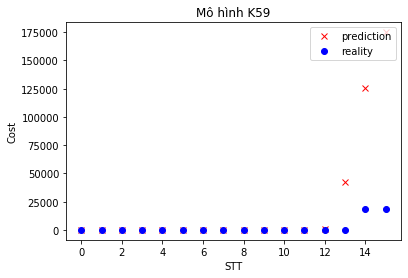

305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
305.30505 	|	 [0.]
477.24277 	|	 [0.]
42476.734 	|	 [0.]
125283.34 	|	 [18285.]
174932.45 	|	 [18285.]


In [9]:
model = keras.models.load_model('/content/driver/My Drive/Deep-Learning/LSTM_Software/Code/Use Data_K60/XTAC_DOAN_TOTALAC_(use model K59)/3_1_ac.h5')

xt_data, ac_data, test_labels = input_test_fn(3, 21)
test_predictions = model.predict(x=[xt_data, ac_data]).flatten()

test_predictions =  test_predictions[3:]
test_labels = test_labels[3:]
plt.plot(test_predictions, 'x',color='r')
plt.plot(test_labels, 'o',color='b')

plt.title("Mô hình K59")
plt.xlabel("STT")
plt.ylabel("Cost")
# mplcursors.cursor(hover=True)
print("actually: ",test_labels)
print("model: ", test_predictions)
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()
for i in range (0, len(test_labels)):
    print(test_predictions[i], "\t|\t", test_labels[i])
